<a href="https://colab.research.google.com/github/Mandagsteve/twitter-sentiment-analysis/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This is a twitter sentiment analysis

In [0]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# twitter api credentials
con_key = 'VfwrXdCm9vATKpaBw519kb16H'
con_sec = 'QF7O86Eq86d4qEwE6bu4WGLUaNQU9xv6UbTxwqGyPnAaWzPqqT'
acc_tok = '2207763368-FDgnqvv4MNirCRaf4A202X63SqmFHN9gkoL0KqF'
acc_tok_sec = 'OuYw5eaSaVr8tggLGO9JFFszkA7zRR1uYyv3zuTNlvAoX'          

In [0]:
#create the authentication object
authenticate = tweepy.OAuthHandler(con_key, con_sec)

#set the access token  and access token secret
authenticate.set_access_token(acc_tok, acc_tok_sec)

#create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
#extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang ="en", tweet_mode = "extended")

#print the last 5 tweets from the account
print("show the 5 recent tweets: \n")
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

show the 5 recent tweets: 

Climate change is one of the toughest challenges the world has ever taken on. But I believe we can avoid a climate catastrophe if we take steps now to reduce emissions and find ways to adapt to a warmer world. Here’s how we’re approaching the challenge: https://t.co/MtZAZHrHyJ https://t.co/MEmsGFsbUN

When Warren Buffett donated the bulk of his fortune to our foundation and joined us as a partner in its work, he urged us to “swing for the fences.” All these years later, that advice still guides how we think about our philanthropy: https://t.co/lmpKbixhOZ https://t.co/UMixa49gdQ

Diseases that cause dementia are only diagnosed after symptoms start. To effectively treat these diseases, we need to be able to diagnose them decades earlier when they first take hold in the brain. https://t.co/MAf1luXE84

We’re hopeful that our foundation’s work with Networks for School Improvement will help increase the number of Black, Latinx, and low-income students who graduate

In [0]:
#create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns =  ['tweets'])

In [15]:
#clean the text 
import re
# Create a function to clean the tweets
def Cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/S+','',text)

  return text

# cleaning the text
df['tweets'] = df['tweets'].apply(Cleantxt)

df


,tweets
0,Climate change is one of the toughest challeng...
1,When Warren Buffett donated the bulk of his fo...
2,Diseases that cause dementia are only diagnose...
3,We’re hopeful that our foundation’s work with ...
4,It was a magical night. I'm very happy to supp...
...,...
95,Melinda's work on behalf of women and girls ar...
96,I’m delighted that _solberg has re-upped Norwa...
97,"Most people know as Africa’s wealthiest man, ..."
98,More and more children are living to see their...


In [0]:
#create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two news columns
df['subjectivity'] = df['tweets'].apply(getSubjectivity)
df['polarity']= df['tweets'].apply(getPolarity)


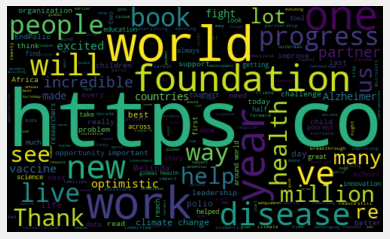

In [17]:
# plot the word cloud
allwords = ' '.join( [twts for twts in df['tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21,max_font_size = 119).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
#create a function to cumpute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positiive'
df['analysis'] = df['polarity'].apply(getAnalysis)  

df

,tweets,subjectivity,polarity,analysis
0,Climate change is one of the toughest challeng...,0.000000,0.000000,neutral
1,When Warren Buffett donated the bulk of his fo...,0.000000,0.000000,neutral
2,Diseases that cause dementia are only diagnose...,0.651667,0.270000,positiive
3,We’re hopeful that our foundation’s work with ...,0.657778,0.131111,positiive
4,It was a magical night. I'm very happy to supp...,0.966667,0.800000,positiive
...,...,...,...,...
95,Melinda's work on behalf of women and girls ar...,0.000000,0.000000,neutral
96,I’m delighted that _solberg has re-upped Norwa...,0.800000,0.750000,positiive
97,"Most people know as Africa’s wealthiest man, ...",0.611111,0.472222,positiive
98,More and more children are living to see their...,0.520000,0.440000,positiive


In [0]:
#print all of the positive tweets
j = 1
sorteddf = df.sort_values(by=['polarity'])
for i in range (0, sorteddf.shape[0]):
  if (sorteddf['analysis'][i] == 'positive'):
    print(str(j) + ') '+sorteddf['tweets'][i])
    print()
    j = j+1

In [23]:
#print all of the negative tweets
j = 1
sorteddf = df.sort_values(by=['polarity'], ascending = 'False')
for i in range (0, sorteddf.shape[0]):
  if (sorteddf['analysis'][i] == 'negative'):
    print(str(j) + ') '+sorteddf['tweets'][i])
    print()
    j = j+1

1) Science is giving us the opportunity to improve lives around the world faster than ever before. Today I was honored to give a speech on this subject at the  annual meeting. AAASmtg https://t.co/03yWD4svD6

2) : The world must work together to slow the coronavirus outbreak, protect the most vulnerable, &amp; develop tools to control this ep…

3) Game on! https://t.co/fhOOsAvqdc

4) It's great to see Microsoft's leadership in this area. Avoiding the worst effects of climate change will require innovation and investment to get us to net zero carbon emissions across all sectors of the economy. https://t.co/plEjWeqdPg

5) These global health heroes have helped Bangladesh become a model for other countries for how to respond to infectious disease outbreaks: https://t.co/5CEHpFCklp https://t.co/Kl6ADN43ux

6) It’s encouraging to see these results. Typhoid is especially deadly for young children, and a vaccine like this has the potential to save millions of lives. https://t.co/2CgV8kCLLm

7